<a href="https://colab.research.google.com/github/DietzscheNostoevsky/Deep_Learning_Chollet/blob/main/DL_chollet_chapter4_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Timing Code
import pytz
import time
import datetime

t0 = time.time()
now_utc = datetime.datetime.utcnow()
ist_tz = pytz.timezone('Asia/Kolkata')
now_ist = now_utc.astimezone(ist_tz)
print("Current time in IST:", now_ist.strftime("%Y-%m-%d %H:%M:%S %Z%z"))

Current time in IST: 2023-04-17 20:55:16 IST+0530


# Classification and Regression with NNs

# Binary Classification
IMDB Dataset

### Loading the dataset

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) 
#num_words = 1000 means only keeping top 10000 words in the data 

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
len(train_data)


25000

In [ ]:
# train_data : list of reviews, each review containing a list of word indices ( encoding a sequence of words)
train_data[0]

In [7]:
# train_labels, 0 , 1 , -ve, +ve review 
train_labels[0]

1

In [8]:
# word index should not exceed 10000, since we are only using top 10000 wods 
max([max(sequence) for sequence in train_data])

9999

#### Decoding the review as text

In [9]:
# Decoding the reviews to text 

word_index = imdb.get_word_index() # word_index is a dictionary mapping words to an integer index.
reverse_word_index = dict([(value,key) for key,value in word_index.items()]) # This gives us a dictionary that maps integer indices to words, which we can use to decode the reviews.

# The imdb.get_word_index() function returns a dictionary that maps words to integer indices. 
# In the returned dictionary, each key is a word and each value is its corresponding index. 
# However, we need a mapping from indices to words, which is what the second line of code accomplishes.

decoded_review = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]]) # indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”

# "?" is the second parameter foe default value to be returned if not found in dict 

1641221/1641221 [==============================] - 0s 0us/step


In [10]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the Data

In [11]:
train_data_review_len = [ len(i) for i in train_data]
train_data_review_len[:10]

[218, 189, 141, 550, 147, 43, 123, 562, 233, 130]

The reviews are of different length. 

You can’t directly feed lists of integers into a neural network. They all have different lengths, but a neural network expects to process contiguous batches of data. You have to turn your lists into tensors.

### Multi-Hot-Encoding

Converting the reviews to tensors 


Multi-hot encode your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [8, 5] into a 10,000-dimensional vector that would be all 0s except for indices 8 and 5, which would be 1s. Then you could use a Dense layer, capable of handling floating-point vector data, as the first layer in your model.

In [14]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i,sequence in enumerate(sequences):
    for j in sequence:
      results[i,j] = 1.
  return results 

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [15]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [16]:
# Vectorizing the labels  

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

print(type(y_train))
print(type(train_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


The data is ready to be fed into a NN

## Building the Model

**Keras Model**

- following architecture choices:
    Two intermediate layers with 16 units each

    A third layer that will output the scalar prediction regarding the sentiment of the current review
    

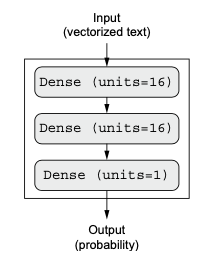

### Model Definition

In [22]:
## NN model 

from tensorflow import keras
from tensorflow.keras import layers 

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")    

])


### Model Compilation

In [23]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

## Validating the approach

### Creating a validation set

In [24]:
len(x_train)

25000

In [25]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


## Training the Model

In [26]:
t1 = time.time()
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

print("Took:{0:.2f} secs to train".format(time.time() - t1))

Epoch 1/20
30/30 [==============================] - 8s 62ms/step - loss: 0.5427 - accuracy: 0.7726 - val_loss: 0.4275 - val_accuracy: 0.8449
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3438 - accuracy: 0.8900 - val_loss: 0.3263 - val_accuracy: 0.8833
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2557 - accuracy: 0.9163 - val_loss: 0.3095 - val_accuracy: 0.8757
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2084 - accuracy: 0.9287 - val_loss: 0.2901 - val_accuracy: 0.8843
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1734 - accuracy: 0.9421 - val_loss: 0.2773 - val_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1470 - accuracy: 0.9527 - val_loss: 0.3046 - val_accuracy: 0.8816
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1292 - accuracy: 0.9601 - val_loss: 0.3231 - val_accuracy: 0.8795
Epoch 8/20
30

In [27]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plotting the training and validation loss

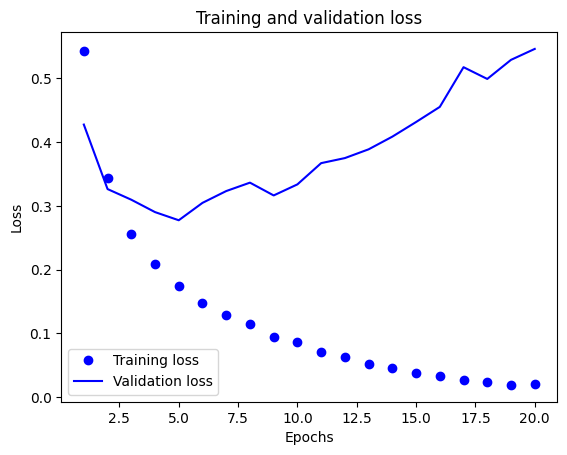

In [28]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Plotting the training and validation loss

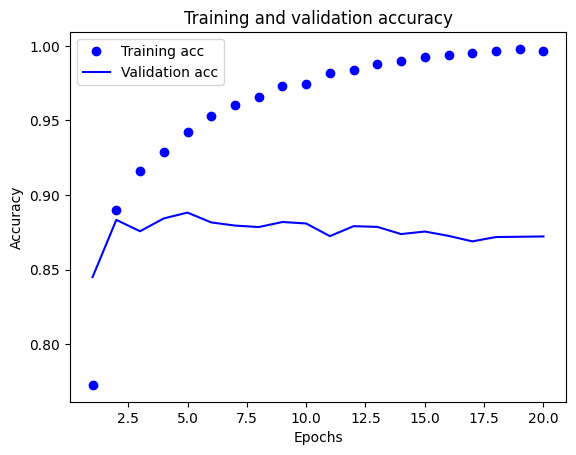

In [29]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Overfitting**

the training loss decreases with every epoch, and the training accuracy increases with every epoch. That’s what you would expect when running gradient- descent optimization—the quantity you’re trying to minimize should be less with every iteration. But that isn’t the case for the validation loss and accuracy: they seem to peak at the fourth epoch. This is an example of what we warned against earlier: a model that performs better on the training data isn’t necessarily a model that will do better on data it has never seen before. In precise terms, what you’re seeing is overfitting: after the fourth epoch, you’re overoptimizing on the training data, and you end up learning representations that are specific to the training data and don’t gener- alize to data outside of the training set.
In this case, to prevent overfitting, you could stop training after four epochs

### Retraining a model from Scratch


In [32]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"],
              )
model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val,y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 43ms/step - loss: 0.4635 - accuracy: 0.8146 - val_loss: 0.2958 - val_accuracy: 0.9072
Epoch 2/4
49/49 [==============================] - 1s 20ms/step - loss: 0.2684 - accuracy: 0.9046 - val_loss: 0.2390 - val_accuracy: 0.9110
Epoch 3/4
49/49 [==============================] - 1s 20ms/step - loss: 0.2122 - accuracy: 0.9224 - val_loss: 0.1993 - val_accuracy: 0.9228
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2852 - accuracy: 0.8864


In [34]:
results

# The first number, 0.29, is the test loss, and the second number, 0.88, is the test accuracy.

[0.28520873188972473, 0.8864399790763855]